In [190]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Cargamos los datos

In [191]:
path = './datasets/heart.csv'
heart_df = pd.read_csv(path)
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [192]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [193]:
feature = heart_df.drop('target', axis=1)
target = heart_df['target']
print(feature.shape)
print(target.shape)

(1025, 13)
(1025,)


## Standarizamos los datos
Para poder aplicar PCA primero tenemos que Standarizar los datos, es decir que $\sigma = 1$ y $\mu = 0$

In [194]:
feature_scaled = StandardScaler().fit_transform(feature)

In [195]:
feature.max()

age          77.0
sex           1.0
cp            3.0
trestbps    200.0
chol        564.0
fbs           1.0
restecg       2.0
thalach     202.0
exang         1.0
oldpeak       6.2
slope         2.0
ca            4.0
thal          3.0
dtype: float64

In [196]:
pd.DataFrame(feature_scaled, columns=feature.columns).describe().round(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00
mean,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.80,-1.51,-0.92,-2.15,-2.33,-0.42,-1.00,-3.40,-0.71,-0.91,-2.24,-0.73,-3.75
25%,-0.71,-1.51,-0.92,-0.66,-0.68,-0.42,-1.00,-0.74,-0.71,-0.91,-0.62,-0.73,-0.52
50%,0.17,0.66,0.06,-0.09,-0.12,-0.42,0.89,0.13,-0.71,-0.23,-0.62,-0.73,-0.52
75%,0.72,0.66,1.03,0.48,0.56,-0.42,0.89,0.73,1.40,0.62,1.00,0.24,1.09
max,2.49,0.66,2.00,3.91,6.17,2.39,2.79,2.30,1.40,4.37,1.00,3.15,1.09


In [197]:
X_train, X_test, y_train, y_test = train_test_split(feature_scaled, target, test_size=0.3, random_state=42)
print('X_train shape = {}'.format(X_train.shape))
print('y_train shape = {}'.format(y_train.shape))
print('X_test shape = {}'.format(X_test.shape))
print('y_test shape = {}'.format(y_test.shape))

X_train shape = (717, 13)
y_train shape = (717,)
X_test shape = (308, 13)
y_test shape = (308,)


## Analisis de componentes principales
Para poder reducir el numero de features que hay en nuestro set de entrenamiento, tenemos que tener los datos Standarizados, es decir que $\sigma = 1$ y las variables Standarizadas tendran la forma.
$$ X_{stand} = \frac{X - \mu}{\sigma} $$
Probamos con obtener 3 componentes principales para el ahorro de costo computacional

In [198]:
pca = PCA(n_components=3)
pca.fit(feature_scaled)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

X_train_pca contiene los valores nuevos que representan a nuestros antiguos datos, estos nuevos valores capturan una gran parte de la varianza de nuestros datos antiguos

In [199]:
X_train.shape

(717, 13)

717 datos de ejemplo, 13 features

In [200]:
X_train_pca.shape

(717, 3)

717 datos de ejemplo, 3 features 

### Varianza obtenida
La primera componente principal de la matriz obtenida, captura la mayor varianza que pueda, la segunda componente tambien captura la mayor varianza en la restante y asi sucesivamente.
Observamos la varianza que representan los datos nuevos son:

array([0.21369912, 0.11971959, 0.09238384])

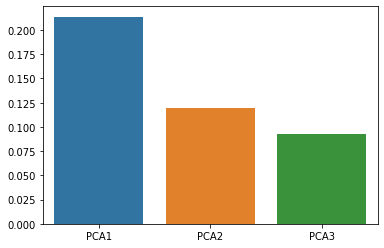

In [201]:
import seaborn as sns
sns.barplot(x = ['PCA1','PCA2', 'PCA3'],y = pca.explained_variance_ratio_)
pca.explained_variance_ratio_

La diferencia entre la primera componente y la segunda es más alta que la diferencia que tienen las demas componentes


Y en total hemos podido capturar el 42% de la varianza de nuestros datos originales

In [202]:
pca.explained_variance_ratio_.sum()

0.4258025558483406

## Incremental PCA

In [203]:
ipca = IncrementalPCA(n_components=3, batch_size=10)
ipca.fit(feature_scaled)
X_train_ipca = ipca.transform(X_train)
X_test_ipca = ipca.transform(X_test)

array([0.21260215, 0.09300232, 0.08134712])

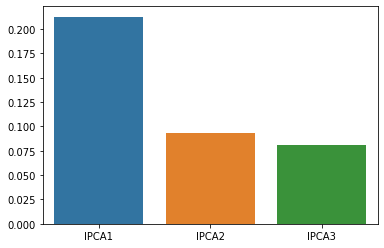

In [204]:
sns.barplot(x = ['IPCA1','IPCA2', 'IPCA3'],y = ipca.explained_variance_ratio_)
ipca.explained_variance_ratio_

In [205]:
ipca.explained_variance_ratio_.sum()

0.3869515937619856

## Modelo de Regresion Logistica
Entrenado un modelo con los datos obtenidos de PCA tenemos el score de

In [206]:
model_pca = LogisticRegression(solver='lbfgs') # solvers =  ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
model_pca.fit(X= X_train_pca, y= y_train)
print('Score = {}'.format(model_pca.score(X_test_pca,y_test)))

Score = 0.8311688311688312


Aplicandolo con los datos obtenidos con IPCA tenemos un score de:

In [207]:
model_ipca = LogisticRegression(solver='lbfgs') # solvers =  ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
model_ipca.fit(X= X_train_pca, y= y_train)
print('Score = {}'.format(model_ipca.score(X_test_ipca,y_test)))

Score = 0.775974025974026


Vemos que con el metodo de PCA con 9 componentes obtenemos mejores resultados